用神经网络对Otto商品分类预测

In [1]:
import numpy as np
import pandas as pd
from patsy import dmatrices
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
import matplotlib.pyplot as plt

从./otto_train.csv读入数据

In [2]:
data = pd.read_csv('./train.csv')

In [3]:
data

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,...,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61873,61874,1,0,0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,2,0,Class_9
61874,61875,4,0,0,0,0,0,0,0,0,...,0,2,0,0,2,0,0,1,0,Class_9
61875,61876,0,0,0,0,0,0,0,3,1,...,0,3,1,0,0,0,0,0,0,Class_9
61876,61877,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,3,10,0,Class_9


In [4]:
data.dtypes

id          int64
feat_1      int64
feat_2      int64
feat_3      int64
feat_4      int64
            ...  
feat_90     int64
feat_91     int64
feat_92     int64
feat_93     int64
target     object
Length: 95, dtype: object

数据中从第一列到倒数第二列是feature

In [5]:
columns = data.columns[1:-1]

In [6]:
X = data[columns]

In [7]:
y = np.ravel(data['target'])

观察商品种类的分布

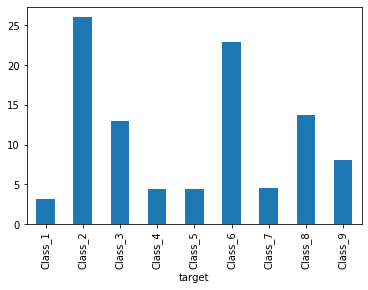

In [8]:
distribution = data.groupby('target').size() / data.shape[0] * 100.0
distribution.plot(kind='bar')
plt.show()

显示一个feature在不同类下的分布图

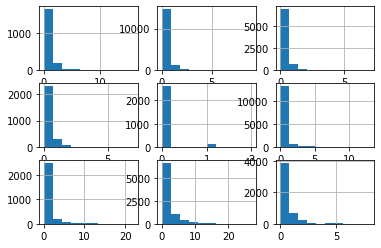

In [9]:
for id in range(9):
    plt.subplot(3, 3, id + 1) # 2行4列
    # plt.axis('off') # 不显示坐标轴
    data[data.target == 'Class_' + str(id + 1)].feat_20.hist()
plt.show()    

显示两个feature的散点图

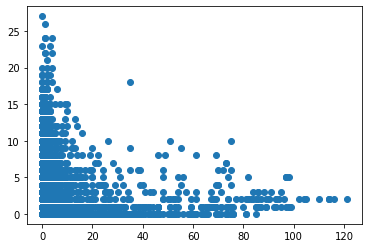

In [10]:
plt.scatter(data.feat_19, data.feat_20)
plt.show()

显示所有feature的相关系数矩阵

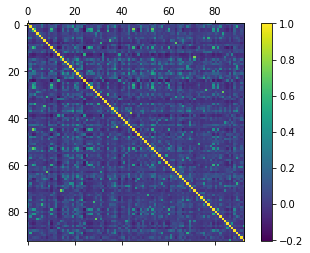

In [11]:
# show relationship between all pairs of features
# correlation

fig = plt.figure()
ax = fig.add_subplot(111) # 1 row, 1 col, 1st plot
cax = ax.matshow(X.corr(), interpolation='nearest')
fig.colorbar(cax)
plt.show()

In [12]:
num_fea = X.shape[1]

初始化神经网络模型，两个隐藏层，整个网络为93x30x10x9

In [13]:
#alpha is L-2 regularization coefficient
model = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes = (30, 10), random_state = 1, verbose = True)

训练模型需要约1分钟

In [ ]:
model.fit(X, y)

观察模型系数和bias

In [ ]:
model.intercepts_

In [ ]:
print(model.coefs_[0].shape)
print(model.coefs_[1].shape)
print(model.coefs_[2].shape)

In [ ]:
pred = model.predict(X)
pred

输出训练数据上的准确度

In [ ]:
model.score(X, y)

In [ ]:
sum(pred == y) / len(y)

在测试数据上进行预测

In [ ]:
test_data = pd.read_csv('./test.csv')
Xtest = test_data[test_data.columns[1:]]
Xtest

In [ ]:
test_prob = model.predict_proba(Xtest)

输出为对每一个商品预测出的属于每一种类别的概率，并加入id列，输出到./otto_prediction.tsv里

In [ ]:
solution = pd.DataFrame(test_prob, columns=['Class_1','Class_2','Class_3','Class_4','Class_5','Class_6','Class_7','Class_8','Class_9'])


In [ ]:
solution['id'] = test_data['id']
cols = solution.columns.tolist()
cols = cols[-1:] + cols[:-1]
solution = solution[cols]

In [ ]:
solution.to_csv('./otto_prediction.tsv', index = False)